# Problem 1 - Model Predictive Control

Creates the Quadrotor object and loads in the animation code.

**Re-run this block anytime you make change to `quadrotor.py`.**

## Simulate the quadrotor using MPC as the controller


segments: 


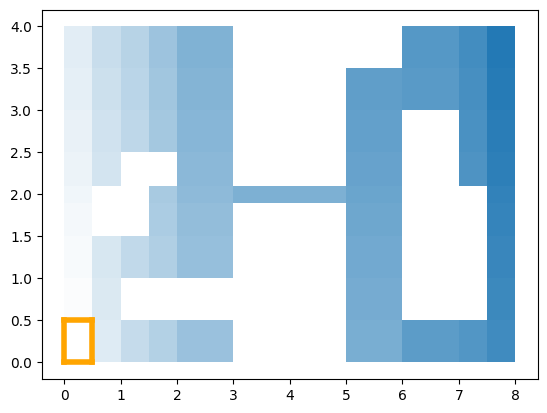

In [1]:
from path_planner_lqrrt import PathPlannerLQRRT
import importlib

# Need to reload the module to use the latest code
import quadrotor_with_pendulum
importlib.reload(quadrotor_with_pendulum)
from quadrotor_with_pendulum import QuadrotorPendulum
from animation import Animation
from obstacles import Obstacles

import matplotlib.pyplot as plt
import numpy as np

# Weights of LQR cost
R = np.eye(2)
Q = np.diag([10, 10, 1, 1, 1, 1, 1, 1])
Qf = Q

# Construct our quadrotor controller 
quadrotor = QuadrotorPendulum(Q, R, Qf, input_max=30)
obstacles = Obstacles("./configs/world_maze.yaml")
obstacles.plot(plt.gca(), plot_segs=True)

print("segments: ")
plt.show()

rrt = PathPlannerLQRRT("./configs/lqrrt.yaml", obstacles, quadrotor)


...planning...
Found plan at elapsed time: 12.451105 s
Tree size: 40
ETA: 212.9 s
lqr success rate: 5.16%


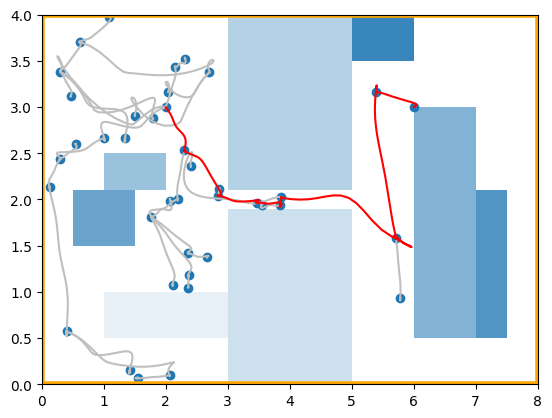

In [3]:
rrt.use_segment = True
planner = rrt.get_planner()
rrt.plot_result(planner)


...planning...
Didn't reach goal.
Tree size: 87
ETA: 90.1 s
lqr success rate: 5.50%


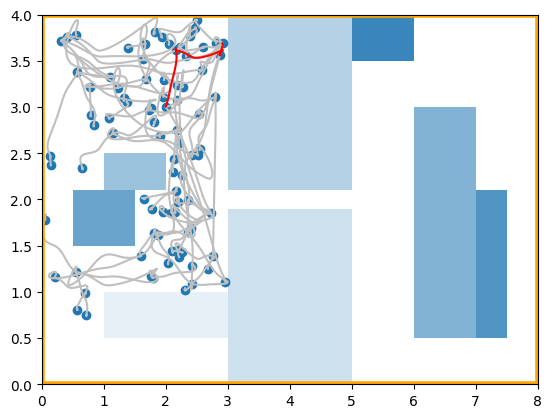

In [4]:
rrt.use_segment = False
planner = rrt.get_planner()
rrt.plot_result(planner)

In [23]:
t, x, u = rrt.interpolate_trajectory(planner)
anime = Animation(obstacles, quadrotor)
anime.set_trajectory(x)
anime.animate()

In [20]:
def merge_rectangles(rectangles):
    if not rectangles:
        return []

    # Sort rectangles based on their x_min value
    rectangles.sort(key=lambda rect: rect[0])

    merged_rectangles = [rectangles[0]]

    for rect in rectangles[1:]:
        # Check if the current rectangle can be merged with the last one
        if rect[0] <= merged_rectangles[-1][2] and rect[1] <= merged_rectangles[-1][3]:
            # Merge rectangles
            merged_rectangles[-1] = [
                min(rect[0], merged_rectangles[-1][0]),
                min(rect[1], merged_rectangles[-1][1]),
                max(rect[2], merged_rectangles[-1][2]),
                max(rect[3], merged_rectangles[-1][3])
            ]
        else:
            # Add the current rectangle to the merged list
            merged_rectangles.append(rect)

    return merged_rectangles

# Example usage:
rectangles = [
    [1, 1, 3, 3],
    [2, 2, 4, 4],
    [5, 5, 6, 6],
    [7, 7, 8, 8],
    [9, 9, 10, 10]
]

merged_result = merge_rectangles(rectangles)
print(merged_result)


[[1, 1, 4, 4], [5, 5, 6, 6], [7, 7, 8, 8], [9, 9, 10, 10]]
